In [1]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [2]:
baseline_K_val = [1, 4, 7, 10, 13]
#baseline_K_val = [1, 4, 7]

SUBJECT = "Minjeong"

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.ModelTrainer(config, subject=f"{SUBJECT}")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_{SUBJECT}/Baseline_results_train_with_{K}data_M.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/18 - Session Exp_2025-08-01-v1/E9AD0E7DCC2B/
(8583, 4, 14, 1) (8583,) (87, 4, 14, 1) (87,)
Dataset 2/18 - Session Exp_2025-08-01-v2/E9AD0E7DCC2B/
second (8583, 4, 14, 1) (8583,) (87, 4, 14, 1) (87,)
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 89.63%
Maximum validation accuracy : 91.95%
Accuracy of test dataset using model V0: 91.9540%
Dataset 3/18 - Session Exp_2025-08-02-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 87.1899%
Dataset 4/18 - Session Exp_2025-08-02-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 88.2687%
Dataset 5/18 - Session Exp_2025-08-09-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 88.5417%
Dataset 6/18 - Session Exp_2025-08-09-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 88.7102%
Dataset 7/18 - Session Exp_2025-08-10-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 87.5043%
Dataset 8/18 - Session Exp_2025-08-10-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 87.7636%
Dataset 9/18 - Session Exp_2025-08-11-v1/E9AD0

In [3]:
b_path = 'C:/Users/hml76/PycharmProjects/MindForce/'
baseline_K = ['1', '4', '7', '10', '13']
#baseline_K = ['1', '4', '7']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_{SUBJECT}/Baseline_results_train_with_{K}data_M.csv')

In [4]:
prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
pd.DataFrame(Trained_acc_all).to_csv(f'../../Results/Results_{SUBJECT}/Train_Test_per_sessions.csv', index=False)


Dataset 1/18 - Session Exp_2025-08-01-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 87.47%
Maximum validation accuracy : 88.74%

Dataset 2/18 - Session Exp_2025-08-01-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 87.17%
Maximum validation accuracy : 87.24%

Dataset 3/18 - Session Exp_2025-08-02-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.95%
Maximum validation accuracy : 86.44%

Dataset 4/18 - Session Exp_2025-08-02-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 90.13%
Maximum validation accuracy : 90.04%

Dataset 5/18 - Session Exp_2025-08-09-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 89.72%
Maximum validatio

In [5]:
for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    val = float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):]))
    print(f"K-{baseline_K[idx]}: {val:.2f}% | Target: {np.mean(Trained_acc_all[int(baseline_K[idx]):])*100:.2f}")

Average of acc without training anything (should be random): 16.65%
Average of acc using previous test data after training: 87.53%
Average of acc using current test data after training: 88.85%
K-1: 87.98% | Target: 88.85
K-4: 89.54% | Target: 89.06
K-7: 90.89% | Target: 89.02
K-10: 91.30% | Target: 89.05
K-13: 90.42% | Target: 88.82


In [6]:
Trained_acc_all

[0.8874279260635376,
 0.8724194169044495,
 0.8643635511398315,
 0.9003937840461731,
 0.8914352059364319,
 0.894517719745636,
 0.8897382616996765,
 0.8896871209144592,
 0.8980773687362671,
 0.8801115155220032,
 0.9008570909500122,
 0.8941012620925903,
 0.888348400592804,
 0.8887085318565369,
 0.8826673030853271,
 0.8916666507720947,
 0.893122673034668,
 0.8846960067749023]

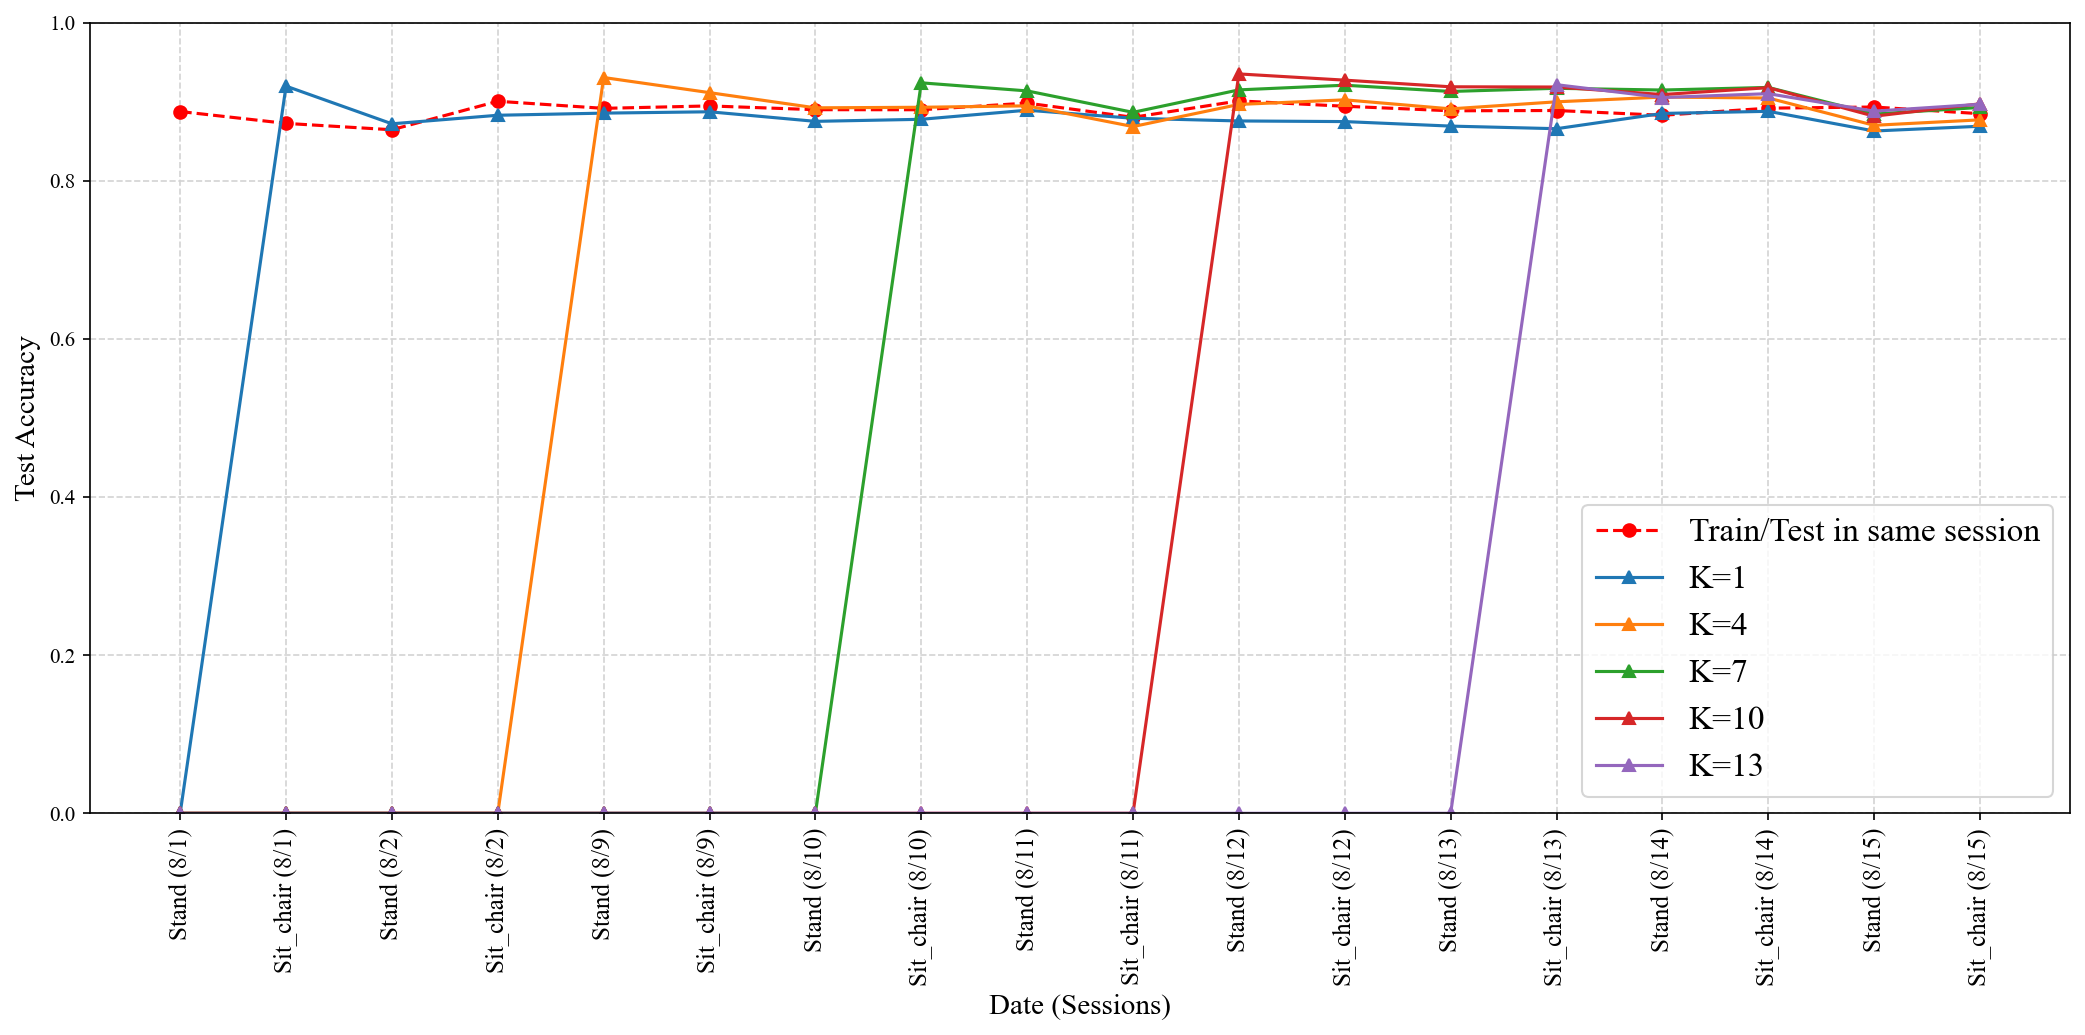

In [7]:
import matplotlib.pyplot as plt

Trained_acc_all_stored = [0.8874279260635376, 0.8724194169044495, 0.8643635511398315, 0.9003937840461731, 0.8914352059364319, 0.894517719745636, 0.8897382616996765, 0.8896871209144592, 0.8980773687362671, 0.8801115155220032, 0.9008570909500122, 0.8941012620925903, 0.888348400592804, 0.8887085318565369, 0.8826673030853271, 0.8916666507720947, 0.893122673034668, 0.8846960067749023]

X_labels = ['Stand (8/1)', 'Sit_chair (8/1)', 'Stand (8/2)', 'Sit_chair (8/2)', 'Stand (8/9)', 'Sit_chair (8/9)', 'Stand (8/10)', 'Sit_chair (8/10)', 'Stand (8/11)', 'Sit_chair (8/11)', 'Stand (8/12)', 'Sit_chair (8/12)', 'Stand (8/13)', 'Sit_chair (8/13)', 'Stand (8/14)', 'Sit_chair (8/14)', 'Stand (8/15)', 'Sit_chair (8/15)']

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(14, 7), dpi=150)
#plt.title('Training from scratch every time', fontsize=15)
plt.plot(Trained_acc_all_stored, c='red', label='Train/Test in same session', marker='o', linestyle='--')
for idx, base in enumerate(baselines):
    baseline_result = pd.read_csv(base)
    plt.plot(X_labels, baseline_result['Accuracy'] / 100, marker='^', label=f'K={baseline_K[idx]}', linestyle='-')

plt.ylim([0, 1])
plt.xlabel('Date (Sessions)', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(fontsize=16, ncol=1, loc='lower right')
plt.grid(True, linestyle='--', color='lightgrey')
plt.tight_layout()
plt.show()